<a href="https://colab.research.google.com/github/ayushNautiyal35/salary_prediction/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import urllib.request

Step 1: Import The data

In [2]:
def get_salary_data():
  url="https://raw.githubusercontent.com/ayushNautiyal35/ML_basic_to_advanced/main/salary_prediction/SalaryData.csv"
  return  pd.read_csv(url)

In [3]:
salary=get_salary_data()
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
salary.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
salary["Gender"].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [7]:
salary["Education Level"].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [8]:
salary["Job Title"].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [9]:
import matplotlib as plt

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

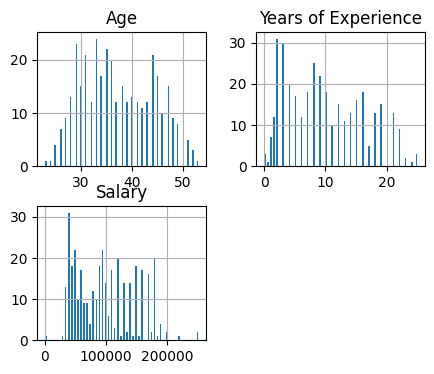

In [10]:
salary.hist(bins=100,figsize=(5,4))

Clean the data

In [11]:
salary.dropna(subset=['Age'],inplace=True)

salary.info()
salary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


Handle text

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


Step 2: Making test set

In [14]:
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split

In [16]:

salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [17]:
import numpy as np
salary['years_cat']=pd.cut(salary['Years of Experience'],bins=[-1,5,10,15,20,25,np.inf],labels=[1,2,3,4,5,6])

In [18]:
salary['years_cat']

0      1
1      1
2      3
3      2
4      4
      ..
370    2
371    4
372    1
373    2
374    3
Name: years_cat, Length: 373, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [19]:
strat_train_set,strat_test_set=train_test_split(salary,test_size=0.22,stratify=salary['years_cat'],random_state=42)

In [20]:
strat_train_set

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,years_cat
174,26.0,Female,Master's,Junior Data Scientist,1.5,45000.0,1
263,31.0,Female,Bachelor's,Junior Marketing Coordinator,3.0,50000.0,1
211,45.0,Female,PhD,Senior Product Designer,15.0,150000.0,3
185,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0,3
144,25.0,Female,Master's,Junior Marketing Specialist,1.5,40000.0,1
...,...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0,1
81,41.0,Female,Master's,Data Analyst,13.0,80000.0,3
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0,4
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0,100000.0,2


In [21]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop('years_cat',axis=1,inplace=True)

In [22]:
strat_train_set

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
174,26.0,Female,Master's,Junior Data Scientist,1.5,45000.0
263,31.0,Female,Bachelor's,Junior Marketing Coordinator,3.0,50000.0
211,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
185,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
144,25.0,Female,Master's,Junior Marketing Specialist,1.5,40000.0
...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
81,41.0,Female,Master's,Data Analyst,13.0,80000.0
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0,100000.0


#visualize the data

<Axes: xlabel='Years of Experience', ylabel='Salary'>

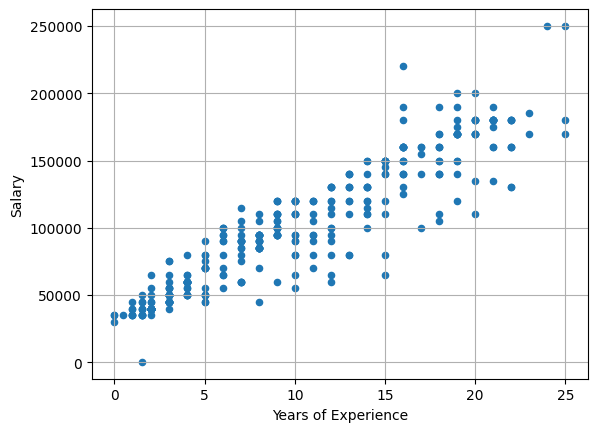

In [23]:
salary.plot(kind="scatter",x="Years of Experience",y="Salary",grid=True)

In [24]:
corr_matrix=salary.corr()

<ipython-input-24-2ef6c4a798a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=salary.corr()


In [25]:
corr_matrix["Salary"]

Age                    0.922335
Years of Experience    0.930338
Salary                 1.000000
Name: Salary, dtype: float64

In [26]:
salary=strat_train_set.drop("Salary",axis=1)

In [27]:
salary_labels=strat_train_set["Salary"].copy()

#prepare the data

In [28]:
gen=salary[['Gender']]
edu=salary[['Education Level']]
job=salary[['Job Title']]
ohe=OneHotEncoder(sparse_output=False)
salary_gen=ohe.fit_transform(gen)
ohe_edu=OneHotEncoder(sparse_output=False)
salary_edu=ohe_edu.fit_transform(edu)
ohe_job=OneHotEncoder(sparse_output=False)
salary_job=ohe_job.fit_transform(job)

In [29]:
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [30]:
ohe_job.categories_

[array(['Account Manager', 'Accountant', 'Administrative Assistant',
        'Business Analyst', 'Business Intelligence Analyst', 'CEO',
        'Chief Data Officer', 'Chief Technology Officer',
        'Content Marketing Manager', 'Copywriter', 'Creative Director',
        'Customer Service Manager', 'Customer Service Rep',
        'Customer Service Representative', 'Customer Success Rep',
        'Data Analyst', 'Data Entry Clerk', 'Data Scientist',
        'Digital Content Producer', 'Digital Marketing Manager',
        'Director', 'Director of Business Development',
        'Director of Engineering', 'Director of Finance',
        'Director of Human Capital', 'Director of Human Resources',
        'Director of Marketing', 'Director of Operations',
        'Director of Product Management', 'Director of Sales',
        'Director of Sales and Marketing', 'Event Coordinator',
        'Financial Advisor', 'Financial Manager', 'HR Generalist',
        'HR Manager', 'Human Resources Direc

In [31]:
salary_num=salary.select_dtypes(include=[np.number])

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown='ignore'))
preprocessing=make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)))

In [34]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience
174,26.0,Female,Master's,Junior Data Scientist,1.5
263,31.0,Female,Bachelor's,Junior Marketing Coordinator,3.0
211,45.0,Female,PhD,Senior Product Designer,15.0
185,43.0,Male,Bachelor's,Senior IT Project Manager,14.0
144,25.0,Female,Master's,Junior Marketing Specialist,1.5
...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0
81,41.0,Female,Master's,Data Analyst,13.0
47,45.0,Female,Master's,Director of Marketing,16.0
222,33.0,Male,Bachelor's,Senior Product Development Manager,7.0


In [35]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x790dea3a76a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x790de9cba530>)])

In [36]:
salary_prepared=preprocessing.fit_transform(salary)
salary_prepared

<290x159 sparse matrix of type '<class 'numpy.float64'>'
	with 1450 stored elements in Compressed Sparse Row format>

#select and train model

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(salary,salary_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x790dea3a76a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x790de9cba530>)])),
                ('linearregression', LinearRegression())])

In [38]:
salary_prediction=lin_reg.predict(salary)



In [39]:
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(salary_labels,salary_prediction,squared=False)
lin_rmse

5341.245058468914

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
dtr.fit(salary,salary_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x790dea3a76a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x790de9cba530>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [42]:
dtr_predict=dtr.predict(salary)

In [43]:
dtr_rmse=mean_squared_error(salary_labels,dtr_predict,squared=False)
dtr_rmse

1268.5406585123121

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
tree_rmse=-cross_val_score(dtr,salary,salary_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(tree_rmse).describe()

count       10.000000
mean     19104.300919
std       3983.049652
min      15425.013273
25%      17258.167934
50%      17947.386118
75%      19434.677671
max      29819.058423
dtype: float64

In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmse=-cross_val_score(forest_reg,salary,salary_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(forest_rmse).describe()

count       10.000000
mean     15266.994181
std       3446.253796
min      10790.522604
25%      13505.142138
50%      14293.353617
75%      16898.389273
max      22953.600311
dtype: float64

Fine tune model

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(salary_prepared, salary_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790de812e830>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x790de812f7c0>},
                   random_state=42, scoring='neg_mean_squared_error')

Test Model

In [82]:
final_model=rnd_search.best_estimator_
x_test=strat_test_set.drop("Salary",axis=1)
y_test=strat_test_set["Salary"].copy()

x_test_prepared=preprocessing.transform(x_test)
final_prediction=final_model.predict(x_test_prepared)

In [84]:
final_rmse=mean_squared_error(y_test,final_prediction,squared=False)
final_rmse

11976.004310009732

In [86]:
import sklearn.metrics as sm
round(sm.r2_score(y_test, final_prediction), 2)

0.93